<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Separate_NorthSouth_Data_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

## Setup

In [ ]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zip’




# Setting Input Files

In [ ]:

# With POS File
input_file = '/content/WITH - Survey Summary Report_ 20201104.xlsx'

In [ ]:
# Without POS File
input_file_2 = '/content/WITHOUT - Survey Summary Report_ 20201104.xlsx'

# With POS

In [ ]:
# reading in input File
input_file = '/content/WITH - Survey Summary Report_ 20201104.xlsx'
df_master = read_xlsx(input_file, sheet=1)


In [ ]:
# printing DF
print(as_tibble(df_master))

# A tibble: 135 x 42
   RespondentId EmployeeCode UserName BusinessUnit Department `Address of the…
          <dbl>        <dbl> <chr>    <chr>        <chr>      <chr>           
 1         6857        37636 Burhan … Managment    CorpDev    (Blue Area)     
 2         6867        37636 Burhan … Managment    CorpDev    (DHA)           
 3         6868        37636 Burhan … Managment    CorpDev    (Meadows)       
 4         6874        37636 Burhan … Managment    CorpDev    (a)             
 5         6879        30919 Farasat… Customer Se… Operation… (Bank Road Sadd…
 6         6898        37459 Muhamma… Customer Se… Operation… (Bakeman g-11 m…
 7         6905        37459 Muhamma… Customer Se… Operation… (G-11/3 street …
 8         6910        32117 Osama S… Customer Se… Operation… (Test)          
 9         6911        36750 Muhamma… Customer Se… Operation… (Gori town)     
10         6917        36814 Abdul W… Customer Se… Operation… (Commercial)    
# … with 125 more rows, and 36 

In [ ]:
## inspect the data
str(df_master)

tibble [135 × 42] (S3: tbl_df/tbl/data.frame)
 $ RespondentId                                                                                                              : num [1:135] 6857 6867 6868 6874 6879 ...
 $ EmployeeCode                                                                                                              : num [1:135] 37636 37636 37636 37636 30919 ...
 $ UserName                                                                                                                  : chr [1:135] "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" ...
 $ BusinessUnit                                                                                                              : chr [1:135] "Managment" "Managment" "Managment" "Managment" ...
 $ Department                                                                                                                : chr [1:135] "CorpDev" "CorpDev" "CorpDev" "CorpDev" ...
 $ Address of the Outlet:       

In [ ]:
df_master %>% glimpse()

Rows: 135
Columns: 42
$ RespondentId                                                                                                                 <dbl> …
$ EmployeeCode                                                                                                                 <dbl> …
$ UserName                                                                                                                     <chr> …
$ BusinessUnit                                                                                                                 <chr> …
$ Department                                                                                                                   <chr> …
$ `Address of the Outlet:`                                                                                                     <chr> …
$ City                                                                                                                         <chr> …
$ `Do you have "Internet Access" 

In [ ]:
colnames(df_master)

[1] "RespondentId"                                                                                                              
 [2] "EmployeeCode"                                                                                                              
 [3] "UserName"                                                                                                                  
 [4] "BusinessUnit"                                                                                                              
 [5] "Department"                                                                                                                
 [6] "Address of the Outlet:"                                                                                                    
 [7] "City"                                                                                                                      
 [8] "Do you have \"Internet Access\" at your outlet?"                                                                           
 [9] "Does your outlet offer â€œDelivery Serviceâ€\u009d?"                                                                       
[10] "For which purposes do you store â€œCustomer Dataâ€\u009d?"                                                                 
[11] "How did you â€œPayâ€\u009d for your current POS?"                                                                          
[12] "How long does it take for a new employee to â€œLearn your POSâ€\u009d? (in number of days):"                               
[13] "How many \"Employees\" do you have in this outlet?"                                                                        
[14] "How much disruption in â€œInternet Serviceâ€\u009d do you face?"                                                           
[15] "How often do you â€œFace Problemsâ€\u009d with your POS?"                                                                  
[16] "If you had to pay for a new POS, which â€œPayment Typeâ€\u009d would you prefer?"                                          
[17] "Is your POS:"                                                                                                              
[18] "Name of the Outlet:"                                                                                                       
[19] "Number of years you have worked with this organization:"                                                                   
[20] "Please choose the â€œNumber of Outletsâ€\u009d:"                                                                           
[21] "Please choose which â€œKind your POSâ€\u009d you have:"                                                                    
[22] "Please provide an amount in PKR you are â€œWilling to Payâ€\u009d, corresponding to last question:"                        
[23] "Please state your â€œPersonal Observationsâ€\u009d which you believe would be interesting to share about this interaction."
[24] "Please take a picture of the outlet, with itâ€™s name visible"                                                             
[25] "Please take a picture of the visiting card"                                                                                
[26] "POS Name: (Name of the POS Software being used. Not the hardware)"                                                         
[27] "POS Provider: (Name of the company from which POS has been purchased)"                                                     
[28] "Region:"                                                                                                                   
[29] "Respondentâ€™s Phone Number:"                                                                                              
[30] "Respondent's Designation:"                                                                                                 
[31] "Respondent's name:"                                                                            

df_1 hereon

In [ ]:
df_1 = df_master

In [ ]:
nrow(df_1)

[1] 135

In [ ]:
df_1 %>%
  distinct(BusinessUnit)

BusinessUnit
<chr>
Managment
Customer Services North
Customer Services South


In [ ]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [ ]:
df_1 %>%
 filter(BusinessUnit != 'Managment') -> df_2

df_2 hereon

In [ ]:
nrow(df_2)

[1] 131

## Cleaning up the col names

#### removing special characters

In [ ]:
#x = df_2
y = colnames(df_2) 
colnames(df_2) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_2)

[1] "RespondentId"                                                                                                   
 [2] "EmployeeCode"                                                                                                   
 [3] "UserName"                                                                                                       
 [4] "BusinessUnit"                                                                                                   
 [5] "Department"                                                                                                     
 [6] "Address of the Outlet "                                                                                         
 [7] "City"                                                                                                           
 [8] "Do you have Internet Access at your outlet "                                                                    
 [9] "Does your outlet offer Delivery Service "                                                                       
[10] "For which purposes do you store Customer Data "                                                                 
[11] "How did you Pay for your current POS "                                                                          
[12] "How long does it take for a new employee to Learn your POS in number of days "                                  
[13] "How many Employees do you have in this outlet "                                                                 
[14] "How much disruption in Internet Service do you face "                                                           
[15] "How often do you Face Problems with your POS "                                                                  
[16] "If you had to pay for a new POS which Payment Type would you prefer "                                           
[17] "Is your POS "                                                                                                   
[18] "Name of the Outlet "                                                                                            
[19] "Number of years you have worked with this organization "                                                        
[20] "Please choose the Number of Outlets "                                                                           
[21] "Please choose which Kind your POS you have "                                                                    
[22] "Please provide an amount in PKR you are Willing to Pay corresponding to last question "                         
[23] "Please state your Personal Observations which you believe would be interesting to share about this interaction "
[24] "Please take a picture of the outlet with it s name visible"                                                     
[25] "Please take a picture of the visiting card"                                                                     
[26] "POS Name Name of the POS Software being used Not the hardware "                                                 
[27] "POS Provider Name of the company from which POS has been purchased "                                            
[28] "Region "                                                                                                        
[29] "Respondent s Phone Number "                                                                                     
[30] "Respondent s Designation "                                                                                      
[31] "Respondent s name "                                                                                             
[32] "What Language is your POS in "                                                                                  
[33] "What are the Most Important Features in a POS You may choose multiple options "                                 
[34] "What kind of business are you "                                     

In [ ]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [ ]:
df_2 = 
  df_2 %>% clean_names()

In [ ]:
colnames(df_2)

[1] "respondent_id"                                                                                                 
 [2] "employee_code"                                                                                                 
 [3] "user_name"                                                                                                     
 [4] "business_unit"                                                                                                 
 [5] "department"                                                                                                    
 [6] "address_of_the_outlet"                                                                                         
 [7] "city"                                                                                                          
 [8] "do_you_have_internet_access_at_your_outlet"                                                                    
 [9] "does_your_outlet_offer_delivery_service"                                                                       
[10] "for_which_purposes_do_you_store_customer_data"                                                                 
[11] "how_did_you_pay_for_your_current_pos"                                                                          
[12] "how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days"                                  
[13] "how_many_employees_do_you_have_in_this_outlet"                                                                 
[14] "how_much_disruption_in_internet_service_do_you_face"                                                           
[15] "how_often_do_you_face_problems_with_your_pos"                                                                  
[16] "if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer"                                           
[17] "is_your_pos"                                                                                                   
[18] "name_of_the_outlet"                                                                                            
[19] "number_of_years_you_have_worked_with_this_organization"                                                        
[20] "please_choose_the_number_of_outlets"                                                                           
[21] "please_choose_which_kind_your_pos_you_have"                                                                    
[22] "please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question"                         
[23] "please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction"
[24] "please_take_a_picture_of_the_outlet_with_it_s_name_visible"                                                    
[25] "please_take_a_picture_of_the_visiting_card"                                                                    
[26] "pos_name_name_of_the_pos_software_being_used_not_the_hardware"                                                 
[27] "pos_provider_name_of_the_company_from_which_pos_has_been_purchased"                                            
[28] "region"                                                                                                        
[29] "respondent_s_phone_number"                                                                                     
[30] "respondent_s_designation"                                                                                      
[31] "respondent_s_name"                                                                                             
[32] "what_language_is_your_pos_in"                                                                                  
[33] "what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options"                                 
[34] "what_kind_of_business_are_you"                                                                       

#### column mapping

In [ ]:
df_3 = df_2 %>% rename(
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_PAY_FOR_OLD_POS = 'how_did_you_pay_for_your_current_pos',
ORG_EMP_TRAINING =  'how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_OLD_POS_PROBLEMS = 'how_often_do_you_face_problems_with_your_pos',
ORG_NEW_POS_PAYMENT_PREF ='if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_POS_TYPE = 'is_your_pos',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_worked_with_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_OLD_POS_KIND = 'please_choose_which_kind_your_pos_you_have',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_POS_NAME = 'pos_name_name_of_the_pos_software_being_used_not_the_hardware',
ORG_POS_PROVIDER = 'pos_provider_name_of_the_company_from_which_pos_has_been_purchased',
SB_REGION = 'region',
RESP_PHONE = 'respondent_s_phone_number',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
ORG_OLD_POS_LANG = 'what_language_is_your_pos_in',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_business_are_you',
ORG_OLD_POS_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_through_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_DEVICES = 'which_device_s_do_you_use_for_accessing_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_PROVIDER_PAYMENT_METHOD = 'which_method_do_you_use_for_paying_your_pos_vendor',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_OLD_POS_URDU_FEATURES = 'which_of_the_following_features_in_your_pos_are_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_REPLACE_POS = 
'which_of_the_following_can_be_a_reason_to_replace_your_pos_you_may_choose_multiple_options',
ORG_WILLINGNESS_DEMO = 
'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT =
'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card'
)

df_3 hereon

### Exp Graphs

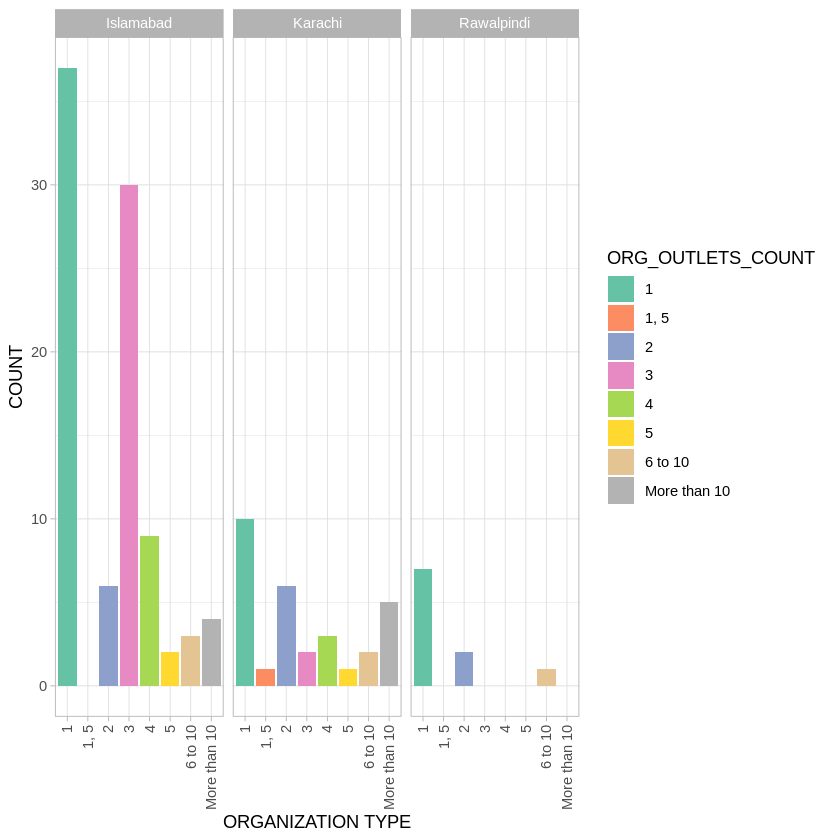

In [ ]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_OUTLETS_COUNT)) +
    geom_bar(aes(fill = ORG_OUTLETS_COUNT), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

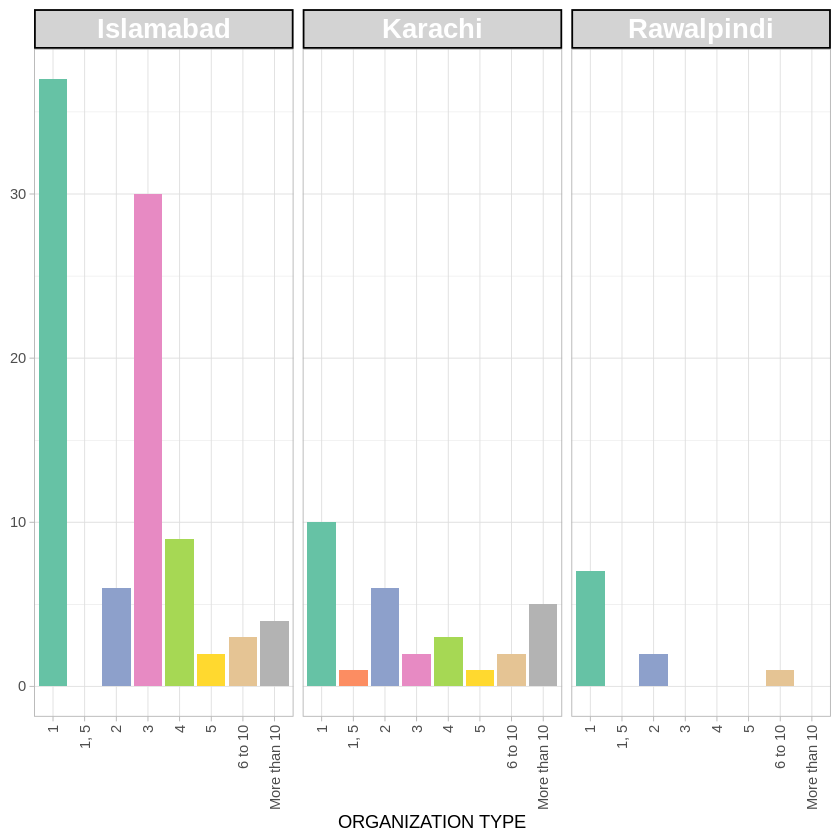

In [ ]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

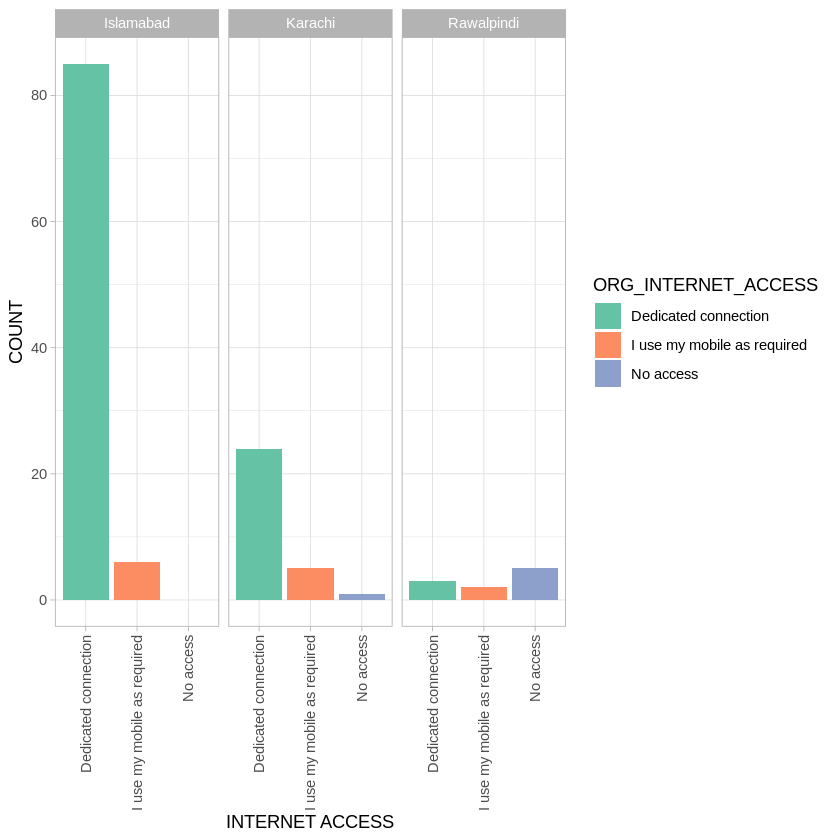

In [ ]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_INTERNET_ACCESS)) +
    geom_bar(aes(fill = ORG_INTERNET_ACCESS), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "INTERNET ACCESS", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

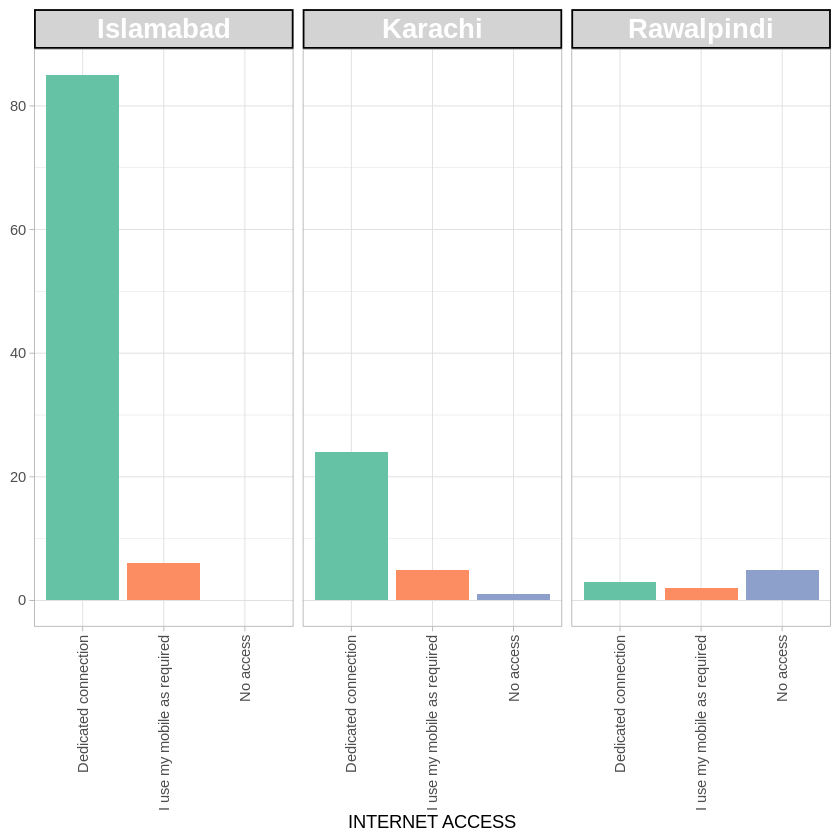

In [ ]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

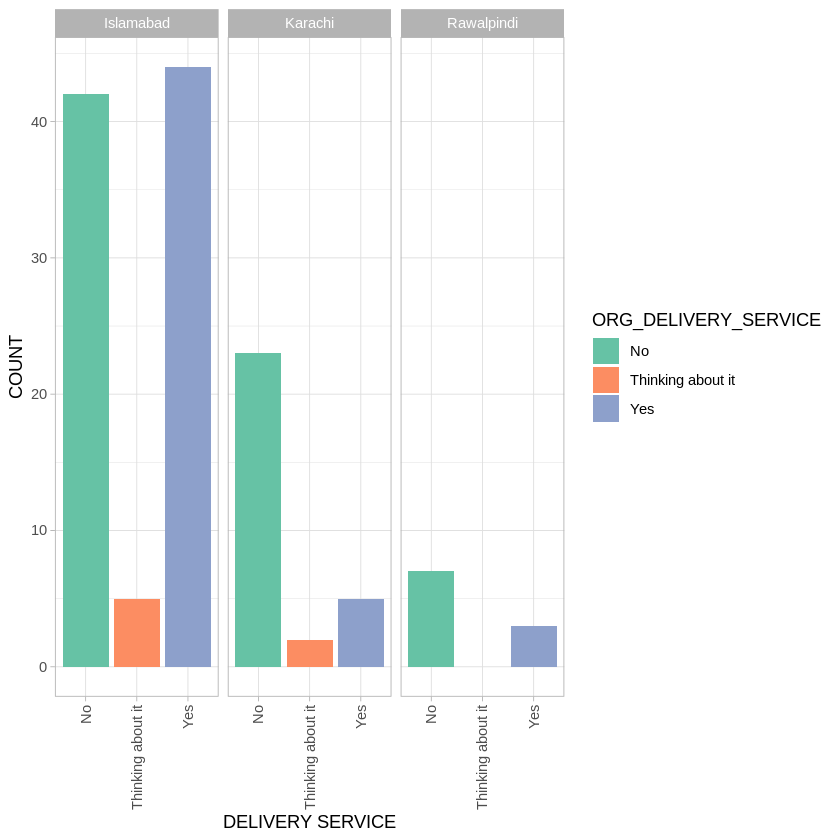

In [ ]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_DELIVERY_SERVICE)) +
    geom_bar(aes(fill = ORG_DELIVERY_SERVICE), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "DELIVERY SERVICE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

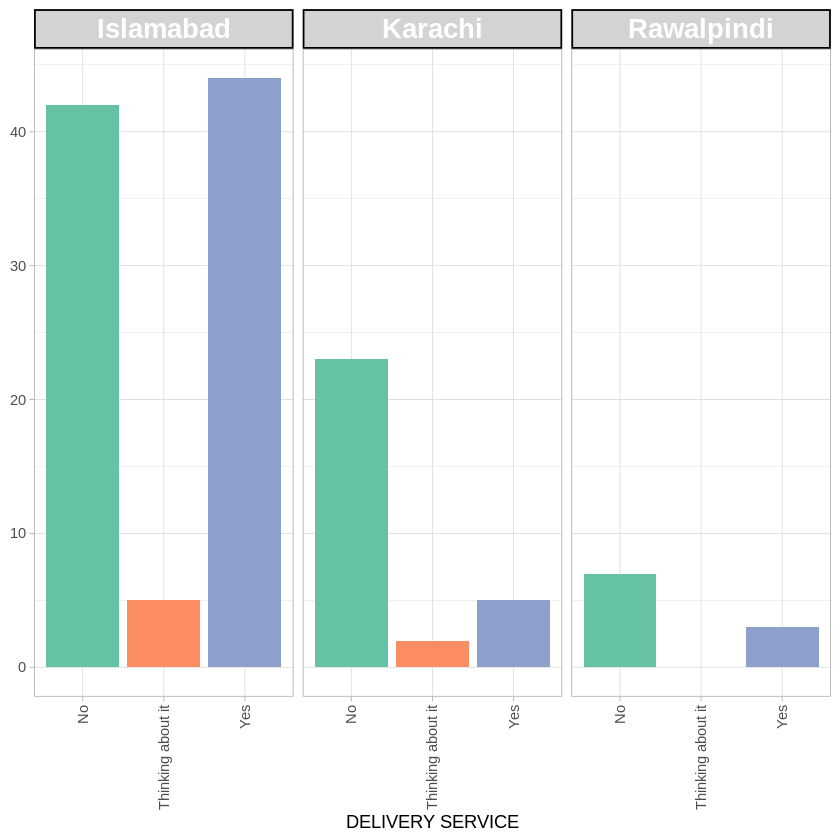

In [ ]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

In [ ]:
# TODO: compile counts of ORG_CUSTOMER_DATA

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


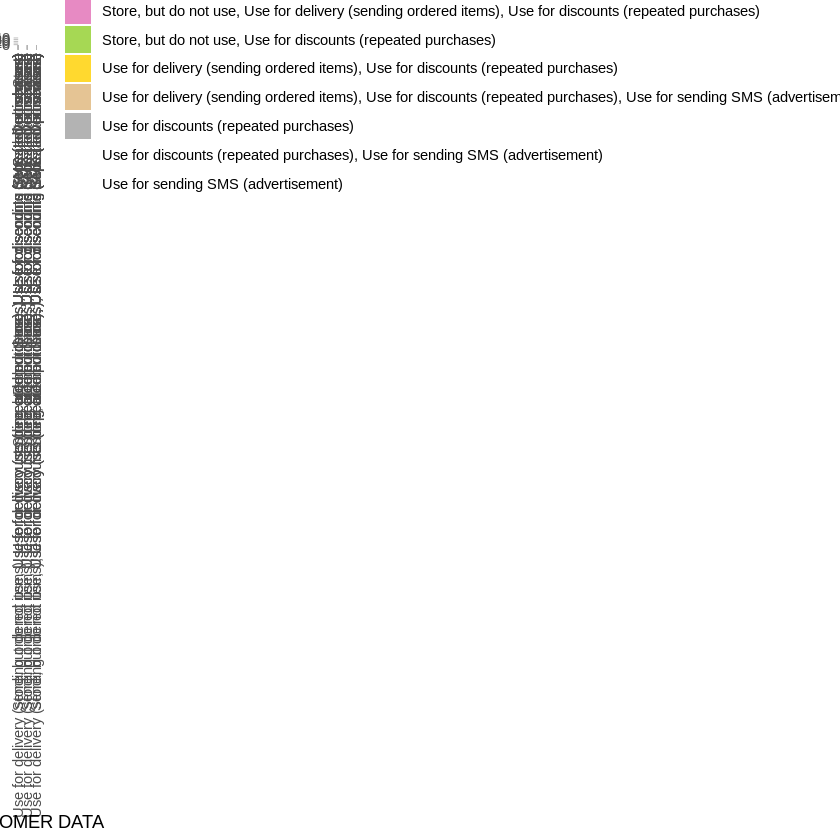

In [ ]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_CUSTOMER_DATA)) +
    geom_bar(aes(fill = ORG_CUSTOMER_DATA), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "CUSTOMER DATA", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

ERROR: ignored

### Exp Graphs Via PURRR

In [ ]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [ ]:
# list of variables to plot
colnames(df_3)

[1] "respondent_id"                       "employee_code"                      
 [3] "user_name"                           "SB_BU"                              
 [5] "SB_DEPT"                             "ORG_ADDRESS"                        
 [7] "ORG_CITY"                            "ORG_INTERNET_ACCESS"                
 [9] "ORG_DELIVERY_SERVICE"                "ORG_CUSTOMER_DATA"                  
[11] "ORG_PAY_FOR_OLD_POS"                 "ORG_EMP_TRAINING"                   
[13] "ORG_EMP_COUNT"                       "ORG_INTERNET_DISRUPTION"            
[15] "ORG_OLD_POS_PROBLEMS"                "ORG_NEW_POS_PAYMENT_PREF"           
[17] "ORG_POS_TYPE"                        "ORG_NAME"                           
[19] "ORG_RESP_TENURE"                     "ORG_OUTLETS_COUNT"                  
[21] "ORG_OLD_POS_KIND"                    "ORG_WILLINGNESS_TO_PAY_AMOUNT"      
[23] "SB_OBSERVATION"                      "ORG_PICTURE_LINK"                   
[25] "ORG_VISITING_CARD"                   "ORG_POS_NAME"                       
[27] "ORG_POS_PROVIDER"                    "SB_REGION"                          
[29] "RESP_PHONE"                          "RESP_DESIGNATION"                   
[31] "RESP_NAME"                           "ORG_OLD_POS_LANG"                   
[33] "ORG_POS_FEATURES"                    "ORG_TYPE"                           
[35] "ORG_OLD_POS_PAYMENT_OPTIONS"         "ORG_OLD_POS_DEVICES"                
[37] "ORG_OLD_POS_PROVIDER_PAYMENT_METHOD" "ORG_DISCOUNTS_OFFERED"              
[39] "ORG_OLD_POS_URDU_FEATURES"           "ORG_REASON_TO_REPLACE_POS"          
[41] "ORG_WILLINGNESS_DEMO"                "ORG_WILLINGNESS_FUTURE_CONTACT"

In [ ]:
#df_3 %>% select(starts_with('ORG'))

In [ ]:
colnames(df_3)[20]

[1] "ORG_OUTLETS_COUNT"

In [ ]:
uni_var = colnames(df_3)[20]
uni_var = set_names(uni_var)
uni_var

ORG_OUTLETS_COUNT 
"ORG_OUTLETS_COUNT"

#### Plotting WorkHorse

In [ ]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     #ggplot(aes(x = ORG_DELIVERY_SERVICE)) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = "DELIVERY SERVICE", y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

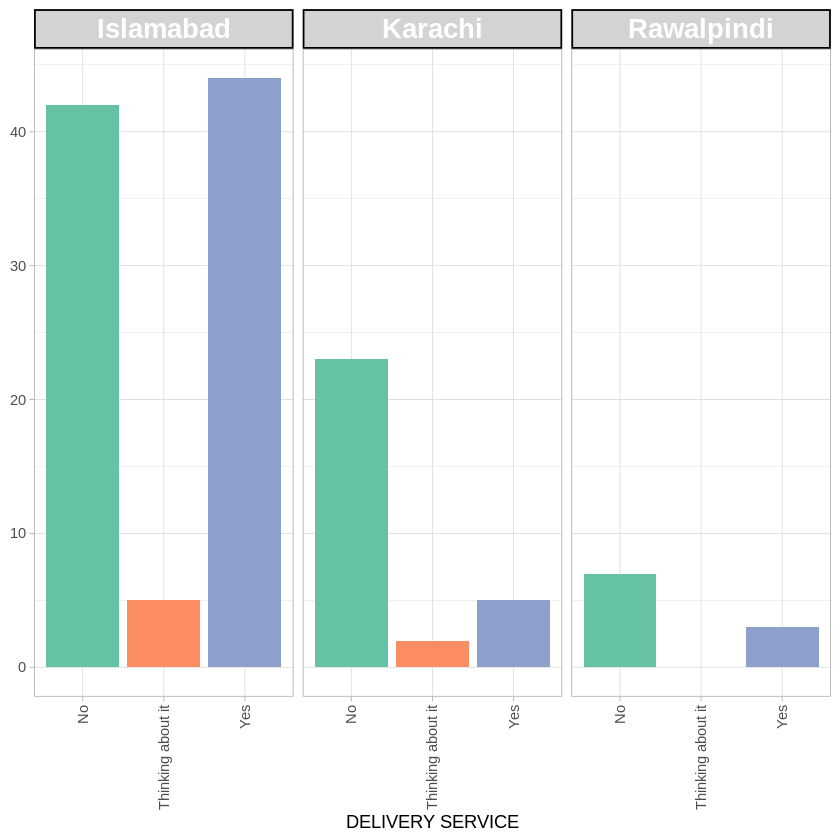

In [ ]:
bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

In [ ]:
# Now using MAP, fixing facet variable to ORG_CITY
uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )

$ORG_OUTLETS_COUNT


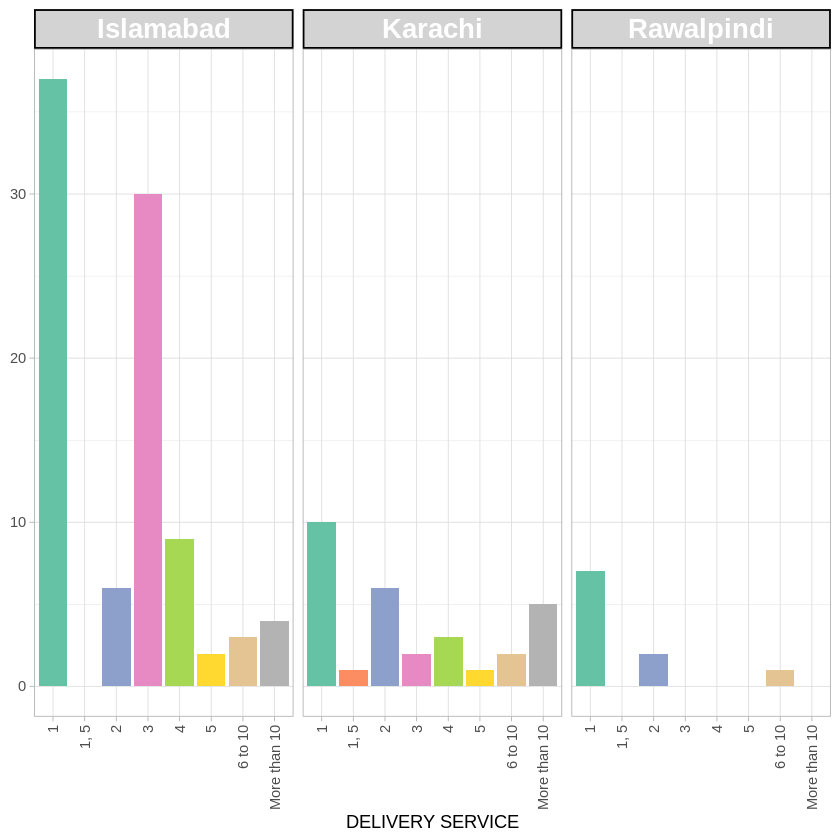

In [ ]:
uni_plots

In [ ]:
# printing the plots
pdf("all_scatterplots.pdf")
uni_plots
dev.off()

$ORG_OUTLETS_COUNT


png 
  2

## NORTH

In [ ]:
# Keep NORTH only

In [ ]:
df_3 %>%
  filter(SB_BU == 'Customer Services North') -> df_with_POS_North

df_with_POS_North hereon

In [ ]:
nrow(df_with_POS_North)

## SOUTH

In [ ]:
# Keep SOUTH only

In [ ]:
df_3 %>%
  filter(SB_BU == 'Customer Services South') -> df_with_POS_South

In [ ]:
nrow(df_with_POS_South)

# Without POS

In [ ]:
# reading in input File
input_file_2 = '/content/WITHOUT - Survey Summary Report_ 20201104.xlsx'
df_m = read_xlsx(input_file_2)

In [ ]:
nrow(df_m)

In [ ]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [ ]:
df_m %>%
 filter(BusinessUnit != 'Managment') -> df_100

In [ ]:
nrow(df_100)

## Cleaning up the col names

#### removing special characters

In [ ]:
#x = df_2
y = colnames(df_100) 
colnames(df_100) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_100)

In [ ]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [ ]:
df_100 = 
  df_100 %>% clean_names()

In [ ]:
colnames(df_100)

#### column mapping

In [ ]:
#### column mapping

In [ ]:
df_101 = df_100 %>% rename(
RESP_ID = 'respondent_id',
SB_EMP_CODE = 'employee_code',
SB_USER_NAME = 'user_name',
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_POS_BUSINESS_IMPROVEMENT = 'do_you_believe_having_a_pos_will_help_you_improve_business',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_EXPAND_BUSINESS = 'do_you_wish_to_expand_your_business_to_more_outlets',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_NEW_POS_PAYMENT_PREF = 'if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_NEW_POS_LANG_PREF = 'if_you_will_ever_have_a_pos_what_language_would_you_like_to_have_it_in',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_owned_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_NEW_POS_KIND = 'please_choose_which_kind_of_pos_will_you_prefer',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card',
SB_REGION = 'region',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
RESP_PHONE = 'respondent_s_phone_number',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_NEW_POS_DEVICES = 'what_device_s_will_you_like_to_use_for_accessing_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_a_business_are_you',
ORG_CURRENT_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_you_may_choose_multiple_options',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_URDU_FEATURES_EXPECTED = 'which_of_the_following_features_will_you_like_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_GET_POS = 'which_of_the_following_can_be_a_reason_to_get_pos_you_may_choose_multiple_options',
ORG_REASON_TO_NOT_HAVE_POS = 'why_do_you_not_have_a_pos',
ORG_WILLINGNESS_DEMO = 'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT = 'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details'
)

## NORTH

In [ ]:
# Keep NORTH only

In [ ]:
df_101 %>%
  filter(SB_BU == 'Customer Services North') -> df_without_POS_North

In [ ]:
nrow(df_without_POS_North)

## SOUTH

In [ ]:
# Keep SOUTH only

In [ ]:
df_101 %>%
  filter(SB_BU == 'Customer Services South') -> df_without_POS_South

In [ ]:
nrow(df_without_POS_South)

# Writing Output Files

## Write XLSX Files

In [ ]:
# formatting options for Date/Time
#https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/strptime

## NORTH

In [ ]:
# North Region

In [ ]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
file_name_north=paste ("SurveyData-", st, "-North", ".xlsx", sep="")
print(file_name_north)

In [ ]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 2 worksheets
addWorksheet(wb, "Updated With POS Survey")
addWorksheet(wb, "Updated Without POS Survey")
writeData(wb, "Updated With POS Survey", df_with_POS_North)
writeData(wb, "Updated Without POS Survey", df_without_POS_North)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, file_name_north, overwrite = TRUE)


## SOUTH

In [ ]:
# South Region

In [ ]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
file_name_south=paste ("SurveyData-", st, "-South", ".xlsx", sep="")
print(file_name_south)

In [ ]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 2 worksheets
addWorksheet(wb, "Updated With POS Survey")
addWorksheet(wb, "Updated Without POS Survey")
writeData(wb, "Updated With POS Survey", df_with_POS_South)
writeData(wb, "Updated Without POS Survey", df_without_POS_South)
#saveWorkbook(wb, "SurveyData-20201028-South.xlsx", overwrite = TRUE)
saveWorkbook(wb, file_name_south, overwrite = TRUE)

## Write Summary Stats

In [ ]:
Category = c('With POS', 'Without POS','With POS', 'Without POS')

In [ ]:
Region = c('North','North', 'South','South')

In [ ]:
Target = c(1000,1000,1000,1000)

In [ ]:
Current = c(nrow(df_with_POS_North), nrow(df_without_POS_North), nrow(df_with_POS_South), nrow(df_without_POS_South))

In [ ]:
df_status = tibble(Region=Region, Category=Category, Target=Target,Current=Current)

In [ ]:
# Time Zones
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/timezones.html

In [ ]:
Sys.timezone()

In [ ]:
#str(OlsonNames()) ## typically close to 600 hundred names,
## typically some acronyms/aliases such as "UTC", "NZ", "MET", "Eire", ..., but
## mostly pairs (and triplets) such as "Pacific/Auckland"
#table(sl <- grepl("/", OlsonNames()))
#OlsonNames()[ !sl ] # the simple ones
#head(Osl <- strsplit(OlsonNames()[sl], "/"))
#(tOS1 <- table(vapply(Osl, `[[`, "", 1))) # Continents, countries, ...
#table(lengths(Osl))# most are pairs, some triplets
#str(Osl[lengths(Osl) >= 3])# "America" South and North ...

In [ ]:
## locale-specific version of date()
#format(Sys.time(), "%a %b %d %H %M")

st=format(Sys.time(), "%d%b%Y-%H:%M:%S", tz = "UTC+05:00") # Alphabetic Month Name
file_name_status=paste ("Status-", st, ".csv", sep="")
print(file_name_status)

In [ ]:
write_csv(df_status,file_name_status)